# Análise Interdisciplinar de uma Operação de Atendimento Online

## Contexto

Este é um projeto fictício desenvolvido com fins de estudo e demonstração de habilidades analíticas aplicadas à compreensão de **operações de atendimento ao cliente**, **experiência do cliente (Customer Experience – CX)** e **análise de dados**.

O projeto adota uma abordagem **data-first**, na qual uma operação de atendimento online via chat é analisada **sem a existência prévia de um problema claramente definido**. A partir da exploração e investigação dos dados operacionais, são identificados padrões, comportamentos recorrentes e possíveis gargalos que impactam tanto o desempenho do processo quanto a experiência do cliente.

Ao longo do estudo, conceitos de **análise operacional**, **Customer Experience** e **frameworks de melhoria contínua** são utilizados como **referência conceitual** para apoiar a interpretação dos achados e a estruturação do problema quando ele se torna evidente. Esses frameworks não são aplicados de forma sequencial ou prescritiva, mas sim utilizados como lentes analíticas para organizar o raciocínio e orientar oportunidades de melhoria.

Essa abordagem reflete situações comuns no ambiente corporativo, em que grandes volumes de dados estão disponíveis, mas os problemas ainda não estão claramente formulados.

---

## Dataset

Os dados utilizados neste estudo foram obtidos na plataforma Kaggle e estão disponíveis no seguinte link:

Customer Service Chat Data – 30k rows  
https://www.kaggle.com/datasets/aimack/customer-service-chat-data-30k-rows

O dataset contém informações relacionadas a atendimentos realizados via chat, incluindo variáveis como tempo de espera do cliente (*customer wait time*), tempo de resposta do agente, duração do atendimento, transferências de chat e notas de satisfação do cliente.

---

## Objetivo do Projeto

O objetivo deste projeto é analisar o comportamento operacional de um processo de atendimento ao cliente via chat, utilizando dados para:

- compreender a dinâmica do processo,
- identificar padrões relevantes e comportamentos não otimizados,
- levantar hipóteses sobre fatores que impactam o tempo de espera e a experiência do cliente.

A partir dos achados analíticos, o projeto busca demonstrar como uma abordagem interdisciplinar — combinando análise de dados, pensamento operacional e foco em experiência do cliente — pode apoiar a **delimitação do problema** e a **proposição de oportunidades de melhoria** de forma conceitual.

Este trabalho faz parte do meu portfólio de habilidades hospedado no GitHub, no contexto de **Análise de Dados Aplicada a Operações e Customer Experience**, e tem como objetivo evidenciar capacidade analítica, senso crítico e visão de processo.

---

**Nota:** Este é um estudo fictício desenvolvido a partir de um dataset público. As análes e interpretações apresentadas possuem caráter educacional e demonstrativo, sem aplicação prática em um ambiente real de negócios.


In [2]:
import pandas as pd

# Carregar o arquivo Excel da pasta do projeto
data = pd.read_excel('chat_data.xlsx')

# Exibir as primeiras linhas do dataset
data.head()


,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time,Text
0,2018-06-08 23:59:00,Zaha,00:18:22,Mobile Service Team,Session:2057187615:23360,Customer,True,Edge 16.16299,Windows-10,Sweden,00:01:02,00:00:43,2018-07-08 00:18:00,,,False,00:00:01,I would really like to know the criteria which...
1,2018-06-08 23:59:00,Berenice,00:03:05,Mobile Technical Team,Session:2057187614:23368,Representative,False,Edge,Windows,Australia,00:00:00,00:00:00,2018-07-08 00:02:00,,,True,00:01:01,NaN
2,2018-06-08 23:59:00,Madi,00:22:33,Mobile Service Team,Session:2057187615:23358,Customer,True,c~67.0.3396.87,Android-4.3,Australia,00:00:32,00:01:28,2018-07-08 00:26:00,,,False,00:00:01,NaN
3,2018-06-08 23:59:00,Rose,00:38:20,Mobile Service Team,Session:2057187616:18361,System,True,Other,11.4.1,NaN,00:00:37,00:01:18,2018-07-08 00:38:00,,,False,00:00:01,Just wondered which airline would give any so...
4,2018-06-08 23:59:00,Sarrah,00:11:50,Fixed Service Team,Session:2057187617:2598,Representative,True,Other,Android 8.1.0,NaN,00:00:21,00:00:38,2018-07-08 00:14:00,,,False,00:00:01,Do they offer lunch or should we eat outside?


In [3]:
# Verificar os tipos de dados em cada coluna
data_types = data.dtypes

# Verificar a quantidade de valores ausentes em cada coluna
missing_values = data.isnull().sum()

# Resumo dos tipos de dados e valores ausentes
data_info = pd.DataFrame({'Data Type': data_types, 'Missing Values': missing_values})

# Exibir o resumo
data_info


,Data Type,Missing Values
Transaction Start Date,datetime64[ns],0
Agent,object,0
Chat Duration,object,0
Teams,object,0
Session Name,object,0
Chat Closed By,object,211
Interactive Chat,bool,0
Browser,object,0
Operating System,object,0
Geo,object,14287


In [4]:
# Definir as colunas que precisam ser convertidas para timedelta
timedelta_columns = ['Chat Duration', 'Response Time of Agent', 'Customer Wait Time']  # Ajuste conforme necessário

# Função para limpar e converter colunas para timedelta
def clean_and_convert_to_timedelta(df, column_name):
    # Remove qualquer entrada que não seja um número ou 'days'
    df[column_name] = df[column_name].astype(str).replace(r'[^0-9d: ]', '', regex=True)
    # Substituir entradas que não são convertíveis por '0 days'
    df[column_name] = df[column_name].replace('', '0 days')  # Isso lida com strings vazias
    df[column_name] = df[column_name].replace('0', '0 days')  # Isso lida com zeros soltos
    df[column_name] = pd.to_timedelta(df[column_name], errors='coerce')  # Converte para timedelta, convertendo erros para NaT
    return df

# Limpar e ajustar as colunas para timedelta
for column in timedelta_columns:
    data = clean_and_convert_to_timedelta(data, column)

# Verificando os tipos das colunas após a conversão
print(data.dtypes)


Transaction Start Date       datetime64[ns]
Agent                                object
Chat Duration               timedelta64[ns]
Teams                                object
Session Name                         object
Chat Closed By                       object
Interactive Chat                       bool
Browser                              object
Operating System                     object
Geo                                  object
Response Time of Agent      timedelta64[ns]
Response time of Visitor             object
Transaction End Date         datetime64[ns]
Customer Rating                      object
Customer Comment                     object
Transferred Chat                       bool
Customer Wait Time          timedelta64[ns]
Text                                 object
dtype: object


In [5]:
# Descrição estatística do dataset
data.describe(include='all')  # Include='all' para descrever também colunas não numéricas


,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Rating,Customer Comment,Transferred Chat,Customer Wait Time,Text
count,31952,31952,31952,31952,31952,31741,31952,31952,31952,17665,31928,31952,31952,31952,31952,31952,31952,31133
unique,NaN,1033,NaN,6,31952,3,2,341,167,62,NaN,300,NaN,12,6,2,NaN,18188
top,NaN,John,NaN,Mobile Service Team,Session:2057187615:23360,Customer,True,Other,MacOS,Australia,NaN,00:00:00,NaN,,,False,NaN,How many award miles do I need for a Mileagepl...
freq,NaN,190,NaN,16688,1,13375,24659,16489,4419,16636,NaN,7305,NaN,27145,27121,26840,NaN,251
mean,2018-06-08 14:46:58.593515264,NaN,0 days 00:17:29.669879819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:32.468460285,NaN,2018-06-08 19:48:52.576990464,NaN,NaN,NaN,0 days 00:00:46.150569604,NaN
min,2018-06-08 00:00:00,NaN,0 days 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,NaN,2018-06-08 00:02:00,NaN,NaN,NaN,0 days 00:00:00,NaN
25%,2018-06-08 11:24:00,NaN,0 days 00:04:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:13,NaN,2018-06-08 11:46:00,NaN,NaN,NaN,0 days 00:00:01,NaN
50%,2018-06-08 14:53:00,NaN,0 days 00:13:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:33,NaN,2018-06-08 15:15:00,NaN,NaN,NaN,0 days 00:00:01,NaN
75%,2018-06-08 18:25:00,NaN,0 days 00:24:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:48,NaN,2018-06-08 18:47:00,NaN,NaN,NaN,0 days 00:00:42,NaN
max,2018-06-08 23:59:00,NaN,0 days 04:12:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:07:16,NaN,2018-07-08 01:54:00,NaN,NaN,NaN,0 days 00:43:44,NaN


In [6]:
# Verificar o tipo de dado da coluna
print(data['Response time of Visitor'].dtype)


object


In [7]:
# Verificar os primeiros valores da coluna para entender o formato
print(data['Response time of Visitor'].head())



0    00:00:43
1    00:00:00
2    00:01:28
3    00:01:18
4    00:00:38
Name: Response time of Visitor, dtype: object


In [8]:
import pandas as pd
import datetime

# Inspecionando os primeiros valores da coluna 'Response time of Visitor'
print(data['Response time of Visitor'].head())

# Função para converter diferentes tipos para timedelta
def convert_to_timedelta(value):
    if isinstance(value, datetime.time):  # Se for do tipo datetime.time
        return pd.to_timedelta(datetime.datetime.combine(datetime.date.min, value) - datetime.datetime.min)
    elif isinstance(value, str):  # Se for string
        try:
            # Se a string representar um tempo, tentando a conversão
            return pd.to_timedelta(value)  # Isso funciona se a string estiver em um formato adequado
        except ValueError:
            return pd.NaT  # Retorna NaT se não for possível converter
    else:
        return pd.NaT  # Retorna NaT para outros tipos

# Aplicando a função à coluna 'Response time of Visitor'
data['Response time of Visitor'] = data['Response time of Visitor'].apply(convert_to_timedelta)

# Verificando o tipo de dado da coluna após a conversão
print(data['Response time of Visitor'].dtype)

# Verificando os dados após a conversão
print(data['Response time of Visitor'].head())



0    00:00:43
1    00:00:00
2    00:01:28
3    00:01:18
4    00:00:38
Name: Response time of Visitor, dtype: object
timedelta64[ns]
0   0 days 00:00:43
1   0 days 00:00:00
2   0 days 00:01:28
3   0 days 00:01:18
4   0 days 00:00:38
Name: Response time of Visitor, dtype: timedelta64[ns]


## Preparação dos Dados para Análise

Nesta etapa, foi realizada a limpeza e o pré-processamento do dataset, com foco em garantir a qualidade e a consistência das informações para as análises subsequentes. As principais atividades executadas foram:

1. **Verificação de Tipos de Dados**  
   Foram identificados e conferidos os tipos de dados de cada coluna do dataset, assegurando compatibilidade com as análises propostas.

2. **Conversão de Tipos de Dados**  
   As colunas que representam durações de tempo (como *Chat Duration*, *Response Time of Agent*, *Response Time of Visitor* e *Customer Wait Time*) foram convertidas para o tipo `timedelta`, possibilitando cálculos corretos e análises temporais mais precisas.

3. **Tratamento de Valores Nulos**  
   Foi realizada a verificação da existência de valores nulos. Embora não tenha sido necessária nenhuma intervenção nesta etapa, essa checagem foi importante para garantir a integridade do dataset.

Com os dados preparados, inicia-se a etapa de **Analyze**, na qual será conduzida a análise exploratória dos dados com o objetivo de identificar padrões, variabilidade e possíveis gargalos no processo de atendimento.


## Análise Exploratória de Dados (EDA)

Nesta seção, é realizada a Análise Exploratória de Dados (EDA) com o objetivo de compreender o comportamento do dataset e identificar padrões, tendências e anomalias iniciais no processo de atendimento.

A EDA permite uma visão geral da variabilidade dos dados e apoia a formulação de hipóteses que serão investigadas posteriormente com maior profundidade, utilizando conceitos e ferramentas do Lean Six Sigma.

As atividades conduzidas nesta etapa incluem:

1. **Descrição Estatística dos Dados**  
   Apresentação das principais métricas descritivas, como média, mediana e desvio padrão, com o objetivo de compreender a distribuição das variáveis analisadas.

2. **Verificação de Valores Nulos**  
   Análise da presença de valores nulos nas diferentes colunas, assegurando a consistência dos dados utilizados nas análises.

3. **Visualizações de Distribuição das Variáveis**  
   Construção de gráficos para visualizar a distribuição das variáveis relevantes, facilitando a identificação de padrões, dispersões e possíveis outliers.

4. **Análise de Correlação entre Variáveis**  
   Investigação das relações entre variáveis operacionais, buscando identificar associações iniciais que possam influenciar o tempo de espera e a experiência do cliente.

Os insights obtidos nesta etapa servirão de base para as análises direcionadas conduzidas posteriormente, nas quais os possíveis gargalos identificados serão avaliados sob a ótica do método DMAIC.


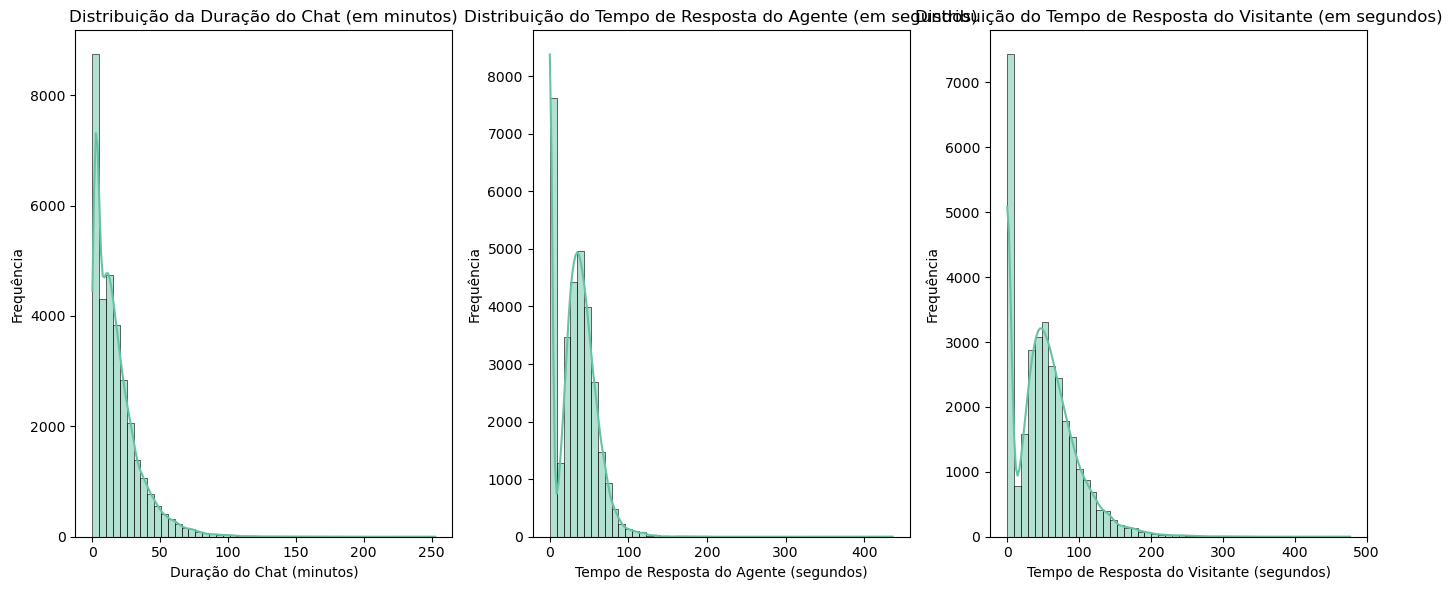

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para os gráficos
sns.set_palette('Set2')

# Histogramas para as durações dos chats e tempos de resposta
plt.figure(figsize=(14, 6))

# Chat Duration
plt.subplot(1, 3, 1)
sns.histplot(data['Chat Duration'].dt.total_seconds() / 60, bins=50, kde=True)
plt.title('Distribuição da Duração do Chat (em minutos)')
plt.xlabel('Duração do Chat (minutos)')
plt.ylabel('Frequência')

# Response Time of Agent
plt.subplot(1, 3, 2)
sns.histplot(data['Response Time of Agent'].dt.total_seconds(), bins=50, kde=True)
plt.title('Distribuição do Tempo de Resposta do Agente (em segundos)')
plt.xlabel('Tempo de Resposta do Agente (segundos)')
plt.ylabel('Frequência')

# Response Time of Visitor
plt.subplot(1, 3, 3)
sns.histplot(data['Response time of Visitor'].dt.total_seconds(), bins=50, kde=True)
plt.title('Distribuição do Tempo de Resposta do Visitante (em segundos)')
plt.xlabel('Tempo de Resposta do Visitante (segundos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



[' ' 10 8 2 0 5 7 4 6 9 1 3]


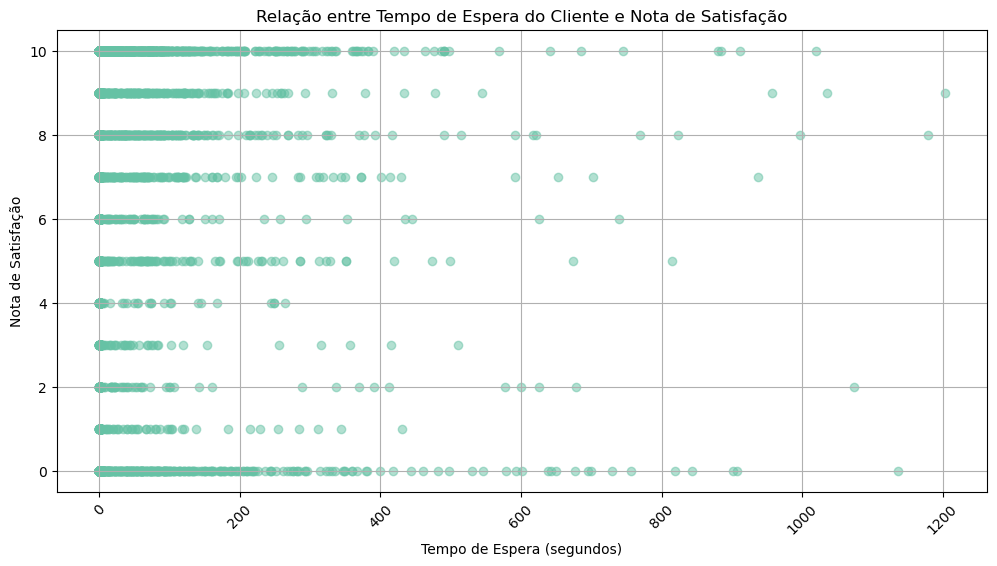

In [12]:
# Verificando valores únicos na coluna 'Customer Rating'
print(data['Customer Rating'].unique())

# Substituindo valores não numéricos ou vazios por NaN
data['Customer Rating'] = pd.to_numeric(data['Customer Rating'], errors='coerce')

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.scatter(data['Customer Wait Time'].dt.total_seconds(), data['Customer Rating'], alpha=0.5)
plt.title('Relação entre Tempo de Espera do Cliente e Nota de Satisfação')
plt.xlabel('Tempo de Espera (segundos)')
plt.ylabel('Nota de Satisfação')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


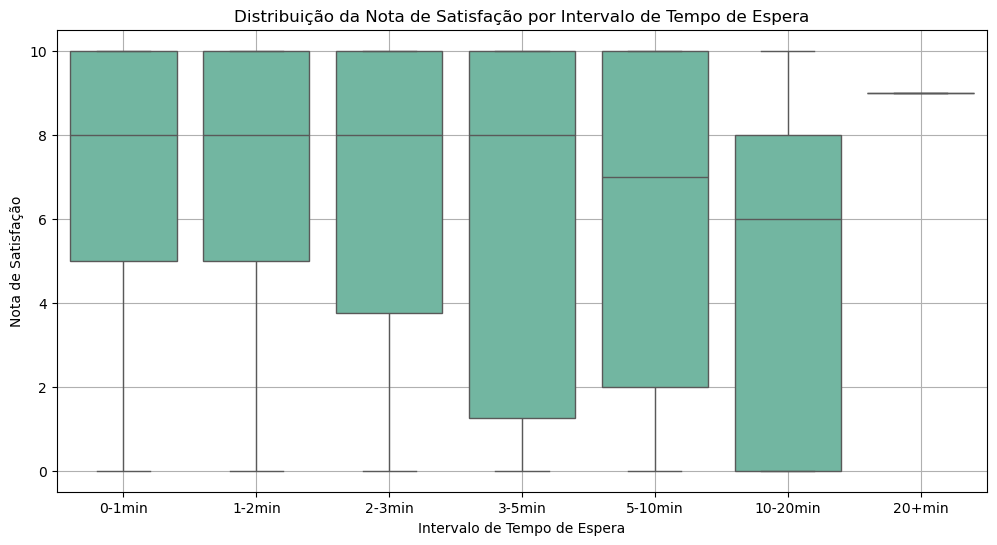

In [13]:
# Adicionando uma coluna de intervalos para o tempo de espera
data['Wait Time Interval'] = pd.cut(data['Customer Wait Time'].dt.total_seconds(), bins=[0, 60, 120, 180, 300, 600, 1200, 3600], labels=['0-1min', '1-2min', '2-3min', '3-5min', '5-10min', '10-20min', '20+min'])

# Boxplot para ver a distribuição das notas de satisfação em relação ao tempo de espera
plt.figure(figsize=(12, 6))
sns.boxplot(x='Wait Time Interval', y='Customer Rating', data=data)
plt.title('Distribuição da Nota de Satisfação por Intervalo de Tempo de Espera')
plt.xlabel('Intervalo de Tempo de Espera')
plt.ylabel('Nota de Satisfação')
plt.grid(True)
plt.show()


## Delimitação do Problema: Tempo de Espera do Cliente

Com base nas análises exploratórias realizadas ao longo do projeto, foram identificados padrões consistentes que indicam uma relação relevante entre o tempo de espera dos clientes e suas notas de satisfação.

A partir desses achados, o **tempo de espera do cliente** foi definido como o principal aspecto a ser aprofundado ao longo do estudo, passando a ser tratado como o foco central de análise e melhoria dentro do contexto do atendimento online.

As principais observações que sustentam essa delimitação são descritas a seguir:

1. **Análise do Gráfico de Dispersão (Tempo de Espera x Nota de Satisfação)**  
   O gráfico de dispersão indicou que, à medida que o tempo de espera aumenta, há uma maior concentração de notas de satisfação iguais a zero. Esse comportamento sugere uma associação negativa entre o tempo de espera e a satisfação do cliente.

2. **Boxplot dos Tempos de Espera e Notas de Satisfação**  
   A análise do boxplot mostrou que, nos intervalos de tempo de espera mais curtos, a mediana das notas de satisfação tende a ser mais elevada. Por outro lado, conforme o tempo de espera aumenta, observa-se uma redução tanto da mediana quanto dos quartis inferiores das avaliações, indicando deterioração da experiência do cliente.

3. **Relevância para a Melhoria do Processo**  
   Diante desses padrões, o tempo de espera se apresenta como um fator crítico do processo de atendimento, alinhando-se aos princípios de melhoria contínua e à redução de desperdícios do tipo *waiting*. A redução desse tempo possui potencial para impactar positivamente a satisfação do cliente e o desempenho operacional.

A partir dessa delimitação, as próximas análises passam a ser direcionadas ao entendimento mais aprofundado do tempo de espera, investigando sua relação com outros fatores operacionais do processo de atendimento.


In [15]:
# Certificando de que a coluna 'Transaction Start Date' está no formato datetime
data['Transaction Start Date'] = pd.to_datetime(data['Transaction Start Date'])

# Extraindo a hora da coluna
data['Hour'] = data['Transaction Start Date'].dt.hour


In [16]:
# Calculando a média das notas de satisfação por hora
average_satisfaction_by_hour = data.groupby('Hour')['Customer Rating'].mean().reset_index()


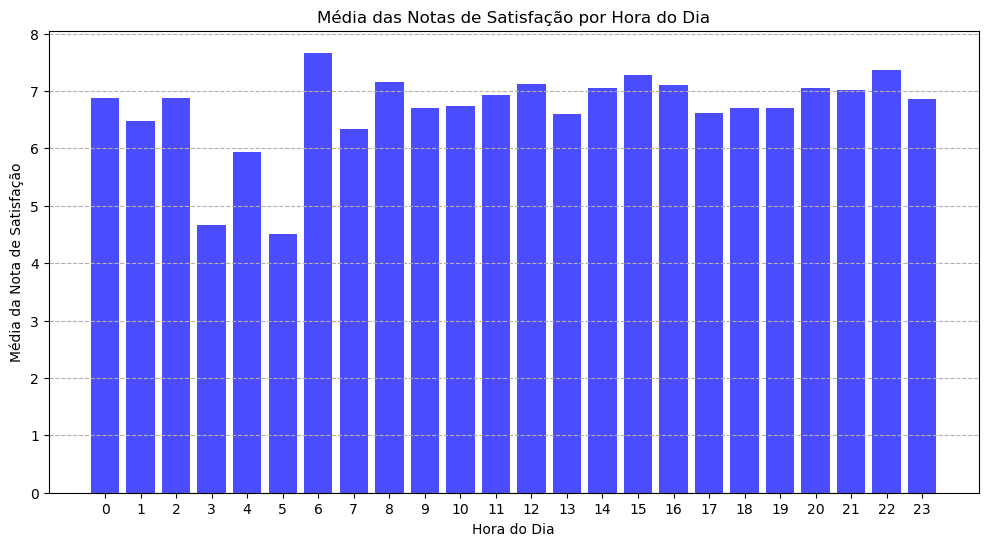

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(average_satisfaction_by_hour['Hour'], average_satisfaction_by_hour['Customer Rating'], color='blue', alpha=0.7)
plt.title('Média das Notas de Satisfação por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média da Nota de Satisfação')
plt.xticks(average_satisfaction_by_hour['Hour'])  # Para garantir que todas as horas sejam mostradas
plt.grid(axis='y', linestyle='--')
plt.show()


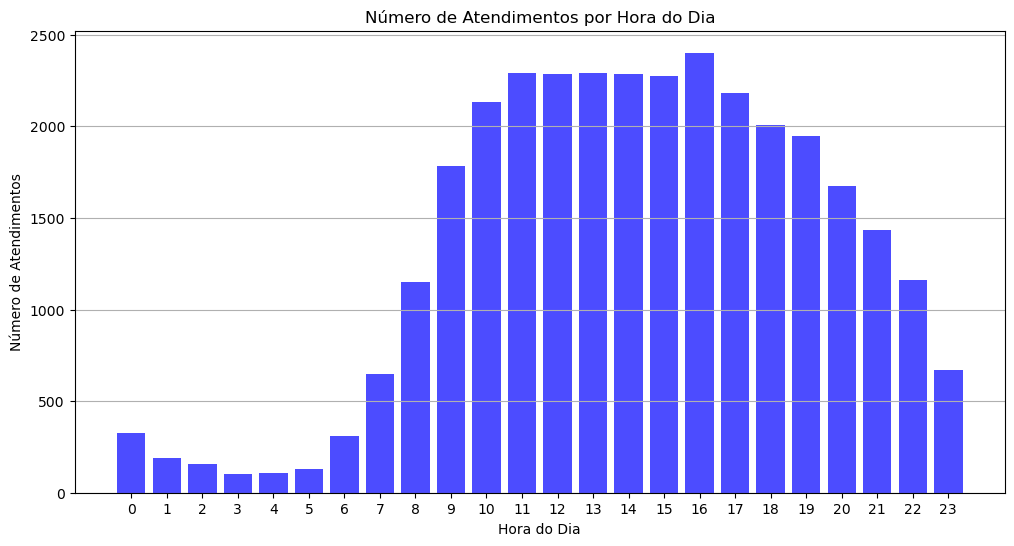

In [18]:
import matplotlib.pyplot as plt

# Extraindo a hora de início da transação
data['Hour'] = data['Transaction Start Date'].dt.hour  # Ajuste o nome da coluna, se necessário

# Contando atendimentos por hora
attendances_per_hour = data['Hour'].value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(attendances_per_hour.index, attendances_per_hour.values, color='blue', alpha=0.7)
plt.title('Número de Atendimentos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Atendimentos')
plt.xticks(range(24))  # Exibir todas as horas
plt.grid(axis='y')
plt.show()


In [19]:
# Filtrando os atendimentos entre 3h e 5h
attendances_3_to_5 = data[(data['Hour'] >= 3) & (data['Hour'] < 5)]

# Contando o total de atendimentos nesse intervalo
total_attendances_3_to_5 = len(attendances_3_to_5)

# Contando quantos desses atendimentos foram avaliados (com nota de satisfação)
evaluated_attendances_3_to_5 = attendances_3_to_5[attendances_3_to_5['Customer Rating'].notnull()]
total_evaluated_3_to_5 = len(evaluated_attendances_3_to_5)

# Exibindo os resultados
print(f'Total de atendimentos entre 3h e 5h: {total_attendances_3_to_5}')
print(f'Total de atendimentos avaliados entre 3h e 5h: {total_evaluated_3_to_5}')


Total de atendimentos entre 3h e 5h: 209
Total de atendimentos avaliados entre 3h e 5h: 26


In [20]:
import pandas as pd

data['Hour'] = data['Transaction Start Date'].dt.hour  # Extraindo a hora do tempo de início

# Total de atendimentos por hora
total_attendimentos_por_hora = data.groupby('Hour').size().reset_index(name='Total Atendimento')

# Total de avaliações por hora
avaliacoes_por_hora = data[data['Customer Rating'].notnull()].groupby('Hour').size().reset_index(name='Total Avaliações')

# Mesclando os dois DataFrames para ter uma visão consolidada
resultados = pd.merge(total_attendimentos_por_hora, avaliacoes_por_hora, on='Hour', how='left')

# Preenchendo valores NaN com 0 (caso não haja avaliações em alguma hora)
resultados['Total Avaliações'] = resultados['Total Avaliações'].fillna(0)

# Calculando a porcentagem de avaliações
resultados['Porcentagem Avaliações'] = (resultados['Total Avaliações'] / resultados['Total Atendimento']) * 100

# Exibindo os resultados
print(resultados)


    Hour  Total Atendimento  Total Avaliações  Porcentagem Avaliações
0      0                327                41               12.538226
1      1                187                32               17.112299
2      2                157                16               10.191083
3      3                101                12               11.881188
4      4                108                14               12.962963
5      5                131                 8                6.106870
6      6                312                33               10.576923
7      7                649                73               11.248074
8      8               1148               160               13.937282
9      9               1785               294               16.470588
10    10               2134               325               15.229616
11    11               2294               373               16.259808
12    12               2286               365               15.966754
13    13            

## Análise Exploratória das Notas de Satisfação por Horário do Dia

Nesta etapa, foi realizada uma análise das notas de satisfação dos atendimentos em função do horário do dia, com o objetivo de investigar se determinados períodos apresentavam padrões consistentes de insatisfação que pudessem indicar problemas operacionais ou oportunidades de melhoria.

### Resultados da Análise

Após o cálculo da média das notas de satisfação por hora do dia, observou-se que o intervalo entre **3h e 5h** apresentou as menores médias de avaliação, com valores aproximados de **4.7**, **5.9** e **4.5**.

Entretanto, ao aprofundar a análise, verificou-se que:

- **Total de atendimentos realizados entre 3h e 5h**: 209  
- **Total de atendimentos avaliados nesse intervalo**: 26  

Ou seja, apenas uma pequena fração dos atendimentos desse período recebeu avaliação por parte dos clientes.

### Interpretação e Conclusão

Com base nesses dados, conclui-se que as menores médias de satisfação observadas entre **3h e 5h** não são estatisticamente representativas, devido ao baixo número de avaliações disponíveis nesse intervalo.

Além disso, é importante considerar que clientes insatisfeitos tendem a avaliar com maior frequência do que clientes satisfeitos, o que pode introduzir viés na interpretação das médias de satisfação quando o volume de avaliações é reduzido.

Dessa forma, os resultados indicam que o horário do dia, isoladamente, não se apresenta como um fator prioritário para direcionar ações de melhoria no processo de atendimento. Essa investigação contribui para o refinamento do foco analítico do projeto, reforçando a necessidade de concentrar a análise em fatores mais diretamente relacionados ao tempo de espera e à dinâmica operacional do atendimento.


In [22]:
import pandas as pd


data['Hour'] = data['Transaction Start Date'].dt.hour  # Extraindo a hora


In [23]:
# Calculando a média do tempo de espera por hora
average_wait_time_by_hour = data.groupby('Hour')['Customer Wait Time'].mean().reset_index()

# Convertendo o tempo de espera para segundos, se necessário
average_wait_time_by_hour['Customer Wait Time'] = average_wait_time_by_hour['Customer Wait Time'].dt.total_seconds()


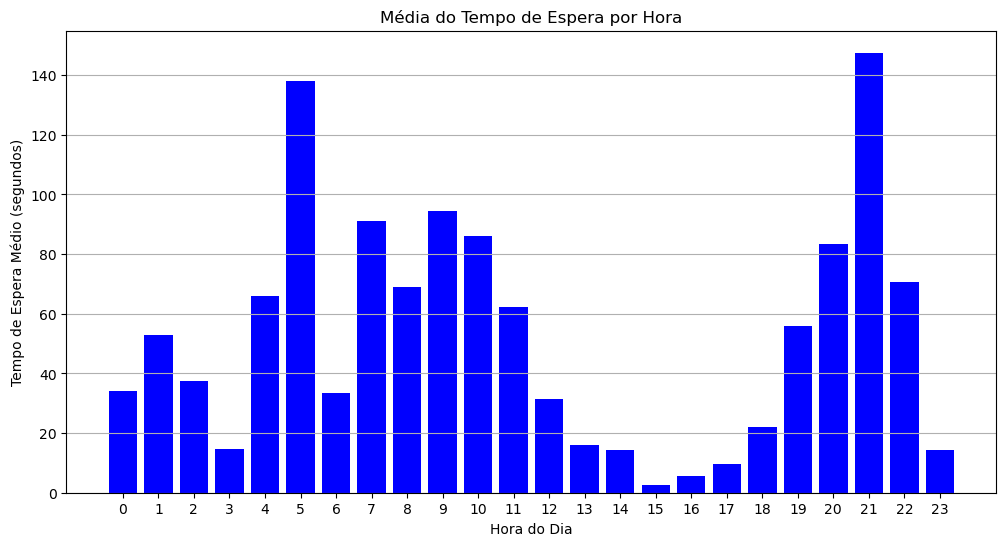

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(average_wait_time_by_hour['Hour'], average_wait_time_by_hour['Customer Wait Time'], color='blue')
plt.title('Média do Tempo de Espera por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Tempo de Espera Médio (segundos)')
plt.xticks(range(24))  # Para mostrar todas as horas
plt.grid(axis='y')
plt.show()


In [25]:
import pandas as pd

# Agrupando por hora e contando o número de agentes únicos
agents_per_hour = data.groupby('Hour')['Agent'].nunique()

# Convertendo a Série resultante em um dicionário
agents_per_hour_dict = agents_per_hour.to_dict()

# Exibindo o dicionário para verificação
print(agents_per_hour_dict)


{0: 94, 1: 73, 2: 57, 3: 35, 4: 27, 5: 38, 6: 75, 7: 142, 8: 238, 9: 356, 10: 448, 11: 470, 12: 552, 13: 579, 14: 630, 15: 599, 16: 627, 17: 565, 18: 543, 19: 447, 20: 374, 21: 299, 22: 290, 23: 244}


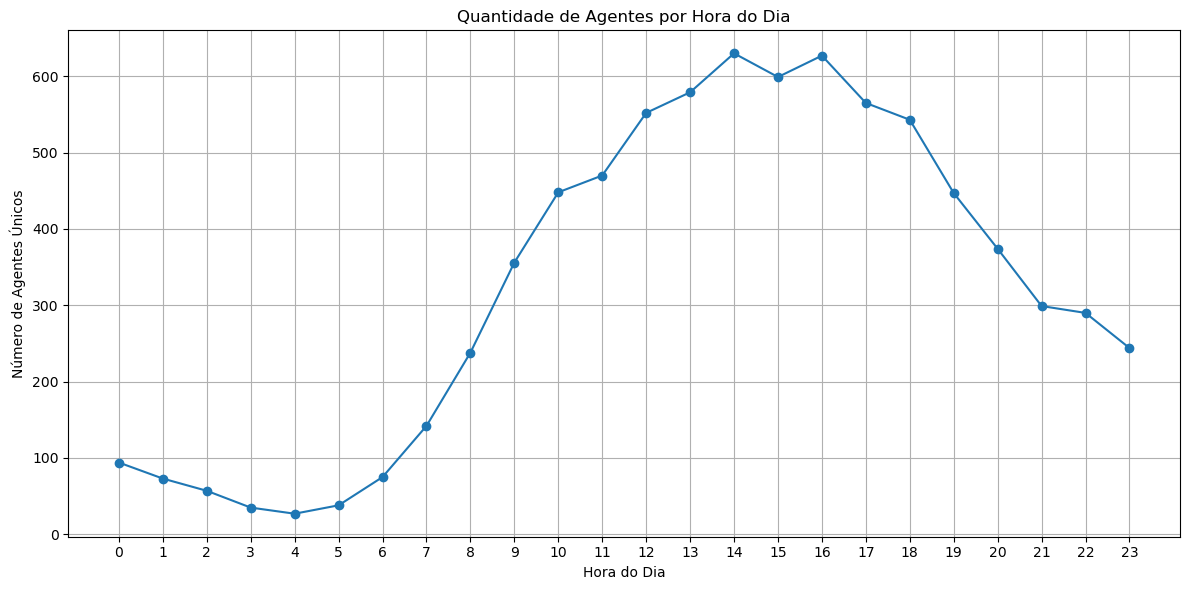

In [26]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(agents_per_hour.index, agents_per_hour.values, marker='o', color='tab:blue')
plt.title('Quantidade de Agentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Agentes Únicos')
plt.xticks(agents_per_hour.index)  # Marca cada hora no eixo x
plt.grid()
plt.tight_layout()
plt.show()



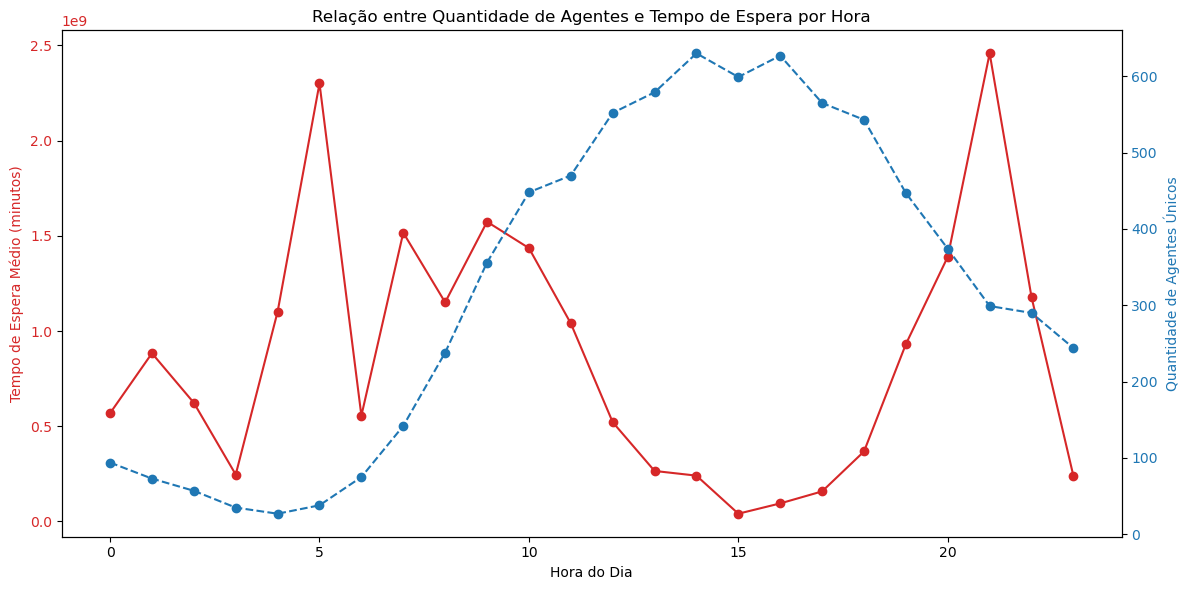

In [27]:
import matplotlib.pyplot as plt

# Calculando o tempo de espera médio por hora em minutos
wait_time_per_hour = data.groupby('Hour')['Customer Wait Time'].mean() / 60  # Convertendo de segundos para minutos

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linha para tempo de espera (lado esquerdo)
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Tempo de Espera Médio (minutos)', color='tab:red')
ax1.plot(wait_time_per_hour.index, wait_time_per_hour.values, color='tab:red', marker='o', label='Tempo de Espera')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Criando um segundo eixo para o gráfico de quantidade de agentes
ax2 = ax1.twinx()  
ax2.set_ylabel('Quantidade de Agentes Únicos', color='tab:blue')
ax2.plot(agents_per_hour.index, agents_per_hour.values, color='tab:blue', marker='o', linestyle='--', label='Agentes Disponíveis')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Relação entre Quantidade de Agentes e Tempo de Espera por Hora')
fig.tight_layout()
plt.show()


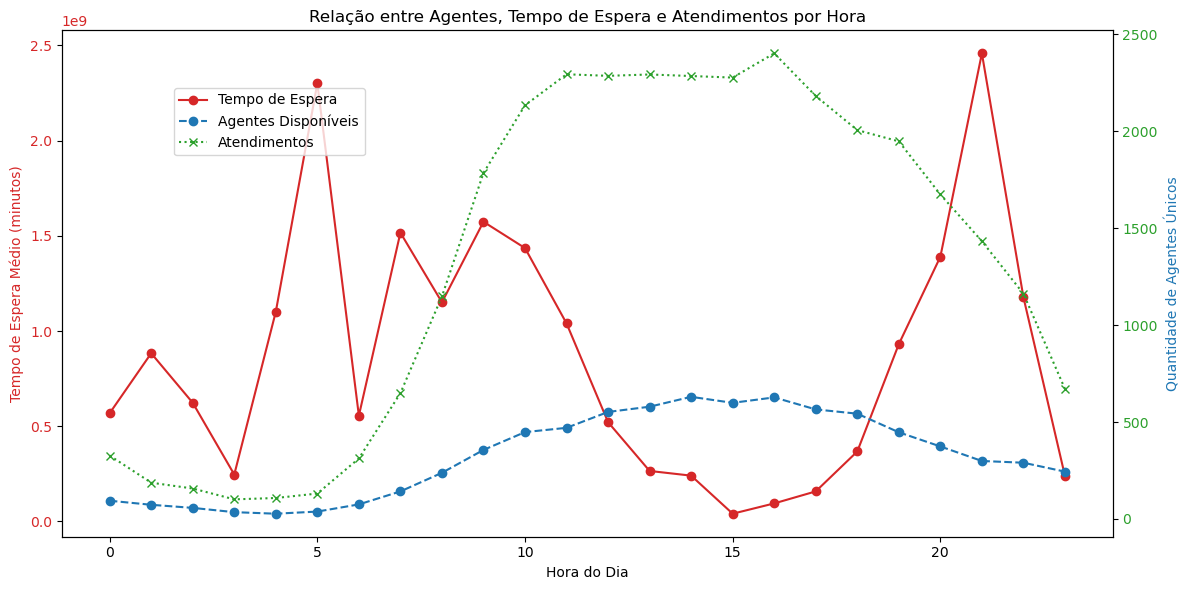

In [28]:
import matplotlib.pyplot as plt

# Calcular o tempo de espera médio por hora em minutos
wait_time_per_hour = data.groupby('Hour')['Customer Wait Time'].mean() / 60  # Convertendo de segundos para minutos

# Calcular a quantidade de atendimentos por hora
attendances_per_hour = data.groupby('Hour')['Session Name'].count()  # Contando atendimentos

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de linha para tempo de espera (lado esquerdo)
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Tempo de Espera Médio (minutos)', color='tab:red')
ax1.plot(wait_time_per_hour.index, wait_time_per_hour.values, color='tab:red', marker='o', label='Tempo de Espera')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Criando um segundo eixo para o gráfico de quantidade de agentes
ax2 = ax1.twinx()  
ax2.set_ylabel('Quantidade de Agentes Únicos', color='tab:blue')
ax2.plot(agents_per_hour.index, agents_per_hour.values, color='tab:blue', marker='o', linestyle='--', label='Agentes Disponíveis')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adicionando a linha de quantidade de atendimentos
ax2.plot(attendances_per_hour.index, attendances_per_hour.values, color='tab:green', marker='x', linestyle=':', label='Atendimentos')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adicionando legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

plt.title('Relação entre Agentes, Tempo de Espera e Atendimentos por Hora')
fig.tight_layout()
plt.show()


## Análise Direcionada: Tempo de Espera e Disponibilidade de Agentes

Após a etapa exploratória inicial e a delimitação do tempo de espera como principal aspecto de interesse, esta seção apresenta uma análise direcionada da relação entre o tempo de espera dos clientes, a quantidade de agentes disponíveis e o volume de atendimentos ao longo do dia.

O objetivo desta análise é compreender como fatores operacionais influenciam o tempo de espera e identificar possíveis desequilíbrios entre oferta de atendimento e demanda.

---

### Gráfico 1: Média do Tempo de Espera por Hora do Dia

O primeiro gráfico apresenta a média do tempo de espera dos clientes ao longo das 24 horas do dia. Observa-se que o tempo de espera varia de forma significativa ao longo do dia, com valores mais elevados durante a noite e a madrugada, especialmente no intervalo entre **3h e 5h**.

Esse comportamento indica a existência de períodos específicos com maior impacto negativo na experiência do cliente.

---

### Gráfico 2: Quantidade de Agentes por Hora do Dia

O segundo gráfico mostra a quantidade de agentes disponíveis ao longo das horas do dia. Nota-se uma maior concentração de agentes nos horários de maior volume de atendimentos, sugerindo que, de forma geral, a alocação de recursos acompanha a demanda operacional.

---

### Gráfico 3: Relação entre Quantidade de Agentes e Tempo de Espera

No terceiro gráfico, é analisada a relação entre a quantidade de agentes disponíveis e o tempo médio de espera. Os resultados indicam uma associação inversa entre essas variáveis: à medida que o número de agentes aumenta, o tempo de espera tende a diminuir.

Esse padrão reforça a relevância da disponibilidade de agentes como fator operacional crítico para a redução do tempo de espera.

---

### Gráfico 4: Relação entre Agentes, Tempo de Espera e Volume de Atendimentos

O quarto gráfico integra três variáveis: quantidade de agentes, tempo de espera e número de atendimentos por hora. Observa-se que, mesmo em períodos de maior volume de atendimentos (principalmente entre **11h e 18h**), o tempo médio de espera se mantém relativamente baixo, indicando uma gestão mais equilibrada da equipe nesses horários.

---

### Síntese dos Achados

A análise direcionada indica que os maiores tempos de espera ocorrem em períodos com menor disponibilidade de agentes, especialmente durante a madrugada. Embora esses períodos apresentem menor volume absoluto de atendimentos, a combinação entre demanda residual e menor capacidade operacional resulta em tempos de espera mais elevados.

Esses achados sugerem que a variabilidade do tempo de espera está fortemente associada a decisões de alocação de recursos ao longo do dia. A partir dessa compreensão, torna-se possível discutir estratégias de melhoria relacionadas à redistribuição de agentes ou ajustes operacionais em períodos críticos, alinhadas aos princípios de melhoria contínua.


In [30]:
# Agrupando o tempo de espera por hora
wait_time_by_hour = data.groupby(data['Transaction Start Date'].dt.hour)['Customer Wait Time'].mean().reset_index()

# Renomeando as colunas
wait_time_by_hour.columns = ['Hour', 'Average Wait Time']

# Exibindo os resultados
print(wait_time_by_hour)


    Hour         Average Wait Time
0      0 0 days 00:00:34.110091743
1      1           0 days 00:00:53
2      2 0 days 00:00:37.388535031
3      3 0 days 00:00:14.782178217
4      4 0 days 00:01:06.083333333
5      5 0 days 00:02:18.030534351
6      6 0 days 00:00:33.330128205
7      7 0 days 00:01:30.989214175
8      8 0 days 00:01:09.039198606
9      9 0 days 00:01:34.429691876
10    10 0 days 00:01:26.137769447
11    11 0 days 00:01:02.405841325
12    12 0 days 00:00:31.283464566
13    13 0 days 00:00:15.916703009
14    14 0 days 00:00:14.440262582
15    15 0 days 00:00:02.447079490
16    16 0 days 00:00:05.695253955
17    17 0 days 00:00:09.477543538
18    18 0 days 00:00:22.054835493
19    19 0 days 00:00:55.878336755
20    20 0 days 00:01:23.397252090
21    21 0 days 00:02:27.490579204
22    22 0 days 00:01:10.661790017
23    23 0 days 00:00:14.324888226


In [31]:
# Agrupando o tempo de espera por agente
wait_time_by_agent = data.groupby('Agent')['Customer Wait Time'].mean().reset_index()

# Ordenando para encontrar os agentes com maior tempo de espera
wait_time_by_agent = wait_time_by_agent.sort_values(by='Customer Wait Time', ascending=False)

# Exibindo os 20 agentes com maior tempo de espera
print(wait_time_by_agent.head(20))


       Agent        Customer Wait Time
97    Arthur           0 days 00:12:52
946     Toby 0 days 00:07:39.333333333
221  Clement 0 days 00:07:17.666666666
286    Drake           0 days 00:07:11
990    Wilma 0 days 00:05:59.738095238
295    Dylan           0 days 00:05:50
156  Braylon 0 days 00:05:42.791666666
209    Chloe 0 days 00:05:39.307692307
588    Lilly    0 days 00:04:44.100000
693     Myla 0 days 00:04:35.181818181
520     Kath 0 days 00:04:32.666666666
144    Blake           0 days 00:04:31
764     Quaz 0 days 00:04:24.948717948
174  Calvert 0 days 00:04:19.862068965
930   Thelma    0 days 00:04:17.300000
65    Anchor 0 days 00:04:08.636363636
247    Darek           0 days 00:04:04
546      Kit 0 days 00:04:03.181818181
995   Yandel    0 days 00:04:01.500000
579  Leonard 0 days 00:04:01.135135135


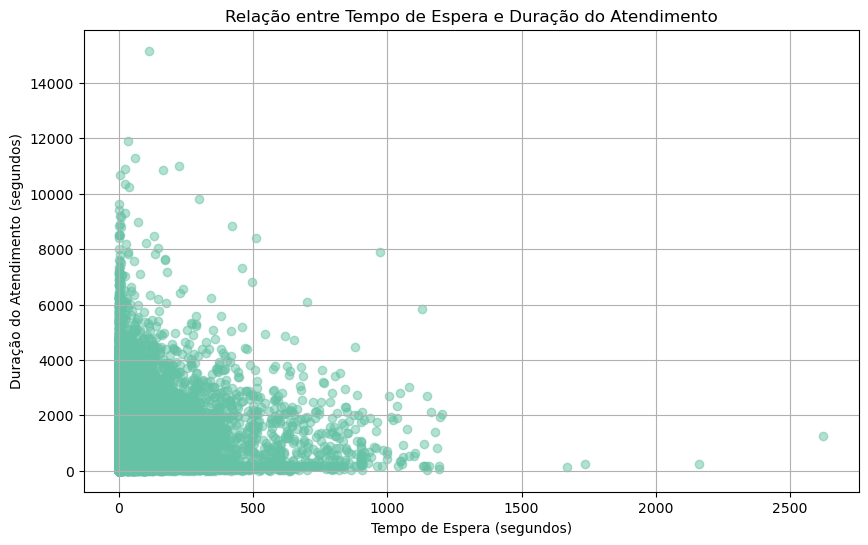

In [32]:
# Criando um gráfico de dispersão
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Customer Wait Time'].dt.total_seconds(), data['Chat Duration'].dt.total_seconds(), alpha=0.5)
plt.title('Relação entre Tempo de Espera e Duração do Atendimento')
plt.xlabel('Tempo de Espera (segundos)')
plt.ylabel('Duração do Atendimento (segundos)')
plt.grid()
plt.show()


In [33]:
# Agrupando o tempo de espera por se a transação foi encaminhada
wait_time_transferred = data.groupby('Transferred Chat')['Customer Wait Time'].mean().reset_index()

# Renomeando as colunas
wait_time_transferred.columns = ['Transferred Chat', 'Average Wait Time']

# Exibindo os resultados
print(wait_time_transferred)


   Transferred Chat         Average Wait Time
0             False 0 days 00:00:40.088599105
1              True 0 days 00:01:17.978286384


In [34]:
# Agrupando os dados pela coluna Customer Comment
analysis = data.groupby('Customer Comment').agg(
    average_satisfaction=('Customer Rating', 'mean'),  # Média da nota de satisfação
    average_wait_time=('Customer Wait Time', 'mean')   # Média do tempo de espera
).reset_index()

# Exibindo a análise
print(analysis)


               Customer Comment  average_satisfaction  \
0                                            6.561983   
1               Did Not Resolve              1.871508   
2  Multiple Contacts to Resolve              7.128878   
3                   No question              6.616505   
4                      Not sure              5.716381   
5                  Yes Resolved              8.876650   

          average_wait_time  
0 0 days 00:00:46.867630249  
1 0 days 00:01:14.319230769  
2 0 days 00:00:48.511363636  
3 0 days 00:00:14.389988358  
4 0 days 00:00:46.735224586  
5 0 days 00:00:39.528553027  


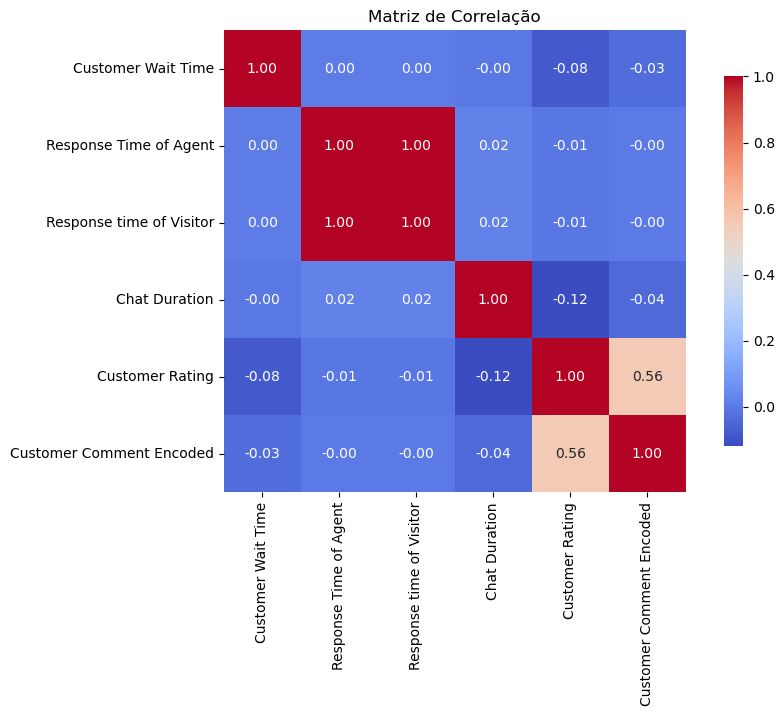

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecione as colunas de interesse
# Para o Customer Comment, considere codificá-lo em variáveis numéricas, se necessário
# Exemplo de codificação simples (apenas se você quiser incluir essa coluna)
data['Customer Comment Encoded'] = data['Customer Comment'].map({
    'Yes Resolved': 1,
    'Did Not Resolve': -1,
    'Not sure': 0,
    'No question': 0,
    'Multiple Contacts to Resolve': -1,
    ' ': 0  # Para valores em branco
})

# Selecione as colunas relevantes para a correlação
correlation_columns = [
    'Customer Wait Time', 
    'Response Time of Agent', 
    'Response time of Visitor', 
    'Chat Duration', 
    'Customer Rating', 
    'Customer Comment Encoded'
]
correlation_matrix = data[correlation_columns].corr()

# Plotando o gráfico de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação')
plt.show()


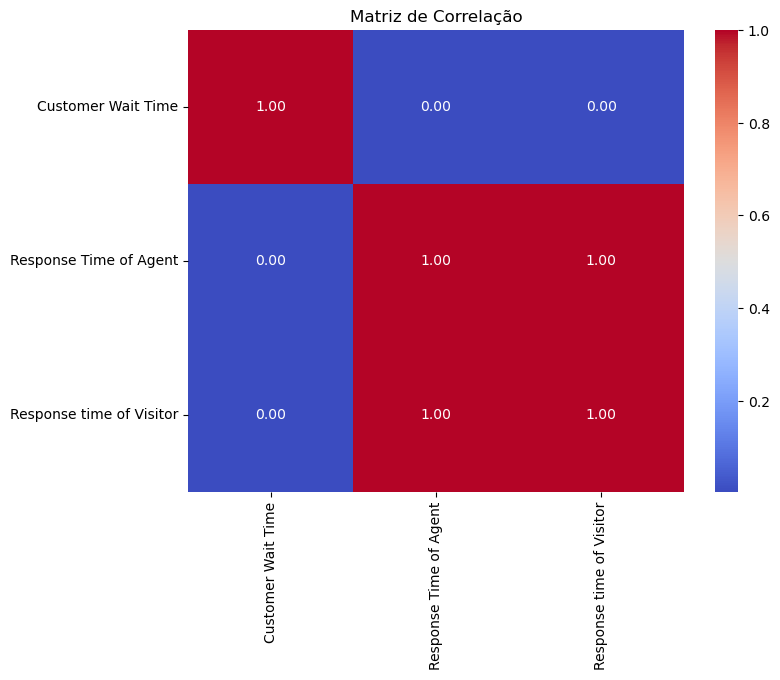

In [36]:
correlation_matrix = data[['Customer Wait Time', 'Response Time of Agent', 'Response time of Visitor']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


In [37]:
# Calculando a média de notas de satisfação e a contagem de transferidos e não transferidos
average_rating_transfer = data.groupby('Transferred Chat').agg(
    Average_Satisfaction=('Customer Rating', 'mean'),
    Count=('Customer Rating', 'size')
).reset_index()

# Renomeando as colunas para melhor entendimento
average_rating_transfer.columns = ['Transferred Chat', 'Average Satisfaction Rating', 'Count']

# Exibindo os resultados
print(average_rating_transfer)



   Transferred Chat  Average Satisfaction Rating  Count
0             False                     7.127654  26840
1              True                     6.267319   5112


In [38]:
# Extraindo a hora da coluna 'Transaction Start Date'
data['Hour'] = data['Transaction Start Date'].dt.hour

# Contando o número de transferências por hora
transfers_per_hour = data.groupby(['Hour', 'Transferred Chat']).size().unstack(fill_value=0)

# Calculando a porcentagem de transferências em cada hora
transfers_percentage = transfers_per_hour.div(transfers_per_hour.sum(axis=1), axis=0) * 100

# Exibindo o resultado
print(transfers_percentage)


Transferred Chat      False      True 
Hour                                  
0                 88.990826  11.009174
1                 90.909091   9.090909
2                 95.541401   4.458599
3                 91.089109   8.910891
4                 91.666667   8.333333
5                 94.656489   5.343511
6                 91.025641   8.974359
7                 87.827427  12.172573
8                 83.972125  16.027875
9                 82.408964  17.591036
10                83.739456  16.260544
11                82.040105  17.959895
12                84.339458  15.660542
13                83.558657  16.441343
14                82.363239  17.636761
15                83.443127  16.556873
16                81.765196  18.234804
17                83.088909  16.911091
18                82.851446  17.148554
19                83.675565  16.324435
20                85.185185  14.814815
21                86.322401  13.677599
22                87.177281  12.822719
23                87.1833

## Análise Direcionada – Tempo de Espera e Transferências

Após a identificação do tempo de espera como principal aspecto de interesse, esta seção apresenta uma análise aprofundada de fatores operacionais associados a esse indicador, com foco nas transferências de atendimento, na atuação dos agentes e no feedback dos clientes.

O objetivo é compreender de forma mais detalhada quais elementos do processo contribuem para o aumento do tempo de espera e para a deterioração da experiência do cliente.

---

### Tempo de Espera por Agente e por Horário

- **Tempo de Espera por Agente**  
  Foi analisado o tempo médio de espera associado a cada agente, permitindo identificar diferenças de desempenho e possíveis dificuldades na gestão do fluxo de atendimentos. Essa análise fornece subsídios para futuras discussões sobre capacitação, redistribuição de carga ou especialização de atendimento.

- **Tempo de Espera por Horário**  
  O comportamento do tempo de espera ao longo do dia foi revisitado para refinar a compreensão dos picos observados anteriormente e sua relação com outros fatores operacionais analisados.

---

### Relação entre Tempo de Espera e Duração do Atendimento

Foi investigada a relação entre o **tempo de espera** e a **duração do atendimento**, com o objetivo de avaliar se atendimentos mais longos estariam associados a maiores tempos de espera. Os resultados indicam que essa relação não apresenta correlação significativa, sugerindo que o tempo de espera está mais fortemente associado a fatores como disponibilidade de agentes e transferências de atendimento.

---

### Impacto das Transferências no Tempo de Espera e na Satisfação

- **Tempo de Espera em Chats Transferidos**  
  Observou-se que atendimentos transferidos apresentam tempos de espera significativamente maiores. Em média:
  - **Chats transferidos**: 1 minuto e 17 segundos  
  - **Chats não transferidos**: 40 segundos  

  Ou seja, atendimentos transferidos apresentam um tempo de espera quase duas vezes maior.

- **Transferências e Nota de Satisfação**  
  A média das notas de satisfação também se mostrou inferior em atendimentos transferidos:
  - **Chats não transferidos**: 7.13  
  - **Chats transferidos**: 6.26  

  Esses resultados indicam que as transferências impactam negativamente tanto o tempo de espera quanto a percepção de qualidade do atendimento.

---

### Feedback do Cliente e Tempo de Espera

A análise das respostas de **Customer Comment** (feedbacks pré-definidos) mostrou que tempos de espera mais elevados e atendimentos transferidos estão frequentemente associados a comentários como *“Did Not Resolve”* e *“Not Sure”*. Em contrapartida, feedbacks positivos, como *“Yes Resolved”*, tendem a ocorrer em atendimentos com menor tempo de espera.

---

### Correlação entre Variáveis Operacionais

Foi utilizado um mapa de calor para avaliar a correlação entre variáveis como tempo de espera, satisfação do cliente, tempo de resposta do agente e feedback do cliente. A correlação mais significativa observada foi entre **tempo de espera** e **Customer Comment (encoded)**, com coeficiente de **0.56**, indicando uma relação moderada entre essas variáveis.

---

### Distribuição das Transferências ao Longo do Dia

A análise da distribuição das transferências ao longo das 24 horas do dia mostrou que, embora o número absoluto de transferências seja menor durante a madrugada, elas representam uma parcela maior dos atendimentos nesse período. Esse fator contribui para o aumento do tempo de espera e para a piora da experiência do cliente nesses horários.

---

## Síntese dos Achados Analíticos

A análise direcionada permitiu identificar fatores operacionais críticos associados ao aumento do tempo de espera e à redução da satisfação do cliente:

1. **Transferências de Atendimento**  
   Transferências aumentam significativamente o tempo de espera e estão associadas a menores notas de satisfação, indicando um ponto crítico do processo.

2. **Períodos de Baixa Capacidade Operacional**  
   Horários como o intervalo entre **3h e 5h** apresentam maior vulnerabilidade operacional, com menor disponibilidade de agentes e maior impacto negativo no tempo de espera.

3. **Relação entre Tempo de Espera e Experiência do Cliente**  
   Tempos de espera elevados estão associados a feedbacks negativos e percepção de menor qualidade no atendimento.

Esses achados fornecem uma base sólida para a proposição de oportunidades de melhoria de caráter conceitual, alinhadas aos princípios de melhoria contínua e redução de desperdícios do tipo *waiting*.


## Definição do Foco de Melhoria e Oportunidades de Ação

Com base nos achados obtidos ao longo das análises exploratórias e direcionadas, esta seção consolida as principais oportunidades de melhoria identificadas para o processo de atendimento ao cliente via chat.

É importante ressaltar que, por se tratar de um estudo baseado em um dataset público, sem envolvimento direto com a organização analisada, as oportunidades descritas a seguir possuem caráter **hipotético e conceitual**, servindo como exercício de aplicação analítica e metodológica.

---

### 1. Redução de Transferências de Atendimento

- **Oportunidade de Melhoria**  
  Reduzir o número de transferências de atendimento por meio da ampliação do escopo de atuação dos agentes.

- **Justificativa**  
  As análises indicaram que atendimentos transferidos apresentam tempos de espera significativamente maiores e estão associados a notas de satisfação mais baixas, configurando um ponto crítico do processo.

- **Reflexão sobre Autonomia dos Agentes**  
  Avaliar se os agentes possuem autonomia suficiente para resolver a maioria das solicitações sem a necessidade de transferências, considerando alçadas, permissões sistêmicas e desenho do processo de atendimento. Processos excessivamente rígidos podem estar contribuindo para o aumento das transferências e, consequentemente, para a piora da experiência do cliente.

---

### 2. Rebalanceamento da Capacidade Operacional em Horários Críticos

- **Oportunidade de Melhoria**  
  Avaliar a redistribuição de agentes para períodos críticos, especialmente no intervalo entre **3h e 5h** da madrugada.

- **Justificativa**  
  Embora o volume absoluto de atendimentos nesse período seja menor, a combinação entre menor disponibilidade de agentes e maior proporção de transferências resulta em tempos de espera elevados e maior insatisfação dos clientes.

---

### 3. Otimização do Processo de Transferências

- **Oportunidade de Melhoria**  
  Revisar o processo de transferências de atendimento, com foco na redução do tempo adicional gerado por essa etapa.

- **Justificativa**  
  A transferência adiciona tempo ao atendimento e está diretamente associada a piores indicadores de satisfação. Alternativas como equipes especializadas, critérios mais claros de transferência ou processos mais ágeis podem mitigar esse impacto.

---

### 4. Monitoramento Proativo de Indicadores de Satisfação

- **Oportunidade de Melhoria**  
  Implementar mecanismos de monitoramento contínuo de indicadores como tempo de espera e satisfação do cliente (CSAT), com alertas em tempo real para desvios relevantes.

- **Justificativa**  
  A identificação precoce de degradação nos indicadores permite ações corretivas mais rápidas, reduzindo o impacto negativo na experiência do cliente, especialmente em períodos operacionais mais sensíveis.

---

## Ressalva Metodológica

Este estudo foi desenvolvido a partir de um dataset público obtido em fonte externa, sem acesso ao contexto interno, aos processos detalhados ou à estrutura organizacional da empresa analisada. Dessa forma, as oportunidades de melhoria apresentadas não representam recomendações operacionais definitivas, mas sim hipóteses fundamentadas nos dados analisados e em práticas comuns de melhoria contínua no contexto de atendimento ao cliente.


## Considerações sobre Monitoramento e Sustentação das Melhorias

Embora este projeto não contemple a implementação prática das melhorias propostas, é relevante destacar como o processo poderia ser monitorado e sustentado caso as oportunidades de melhoria identificadas viessem a ser aplicadas em um ambiente real de negócios.

As considerações a seguir têm caráter conceitual e refletem boas práticas de gestão operacional e melhoria contínua.

---

### 1. Monitoramento Contínuo de Indicadores

- **Recomendação**  
  Acompanhar de forma contínua indicadores-chave como tempo de espera do cliente, percentual de transferências e satisfação do cliente (CSAT), preferencialmente por meio de dashboards operacionais.

- **Justificativa**  
  O monitoramento sistemático permite identificar desvios de desempenho de forma precoce, possibilitando ações corretivas antes que impactos negativos na experiência do cliente se tornem significativos.

---

### 2. Revisões Periódicas de Desempenho

- **Recomendação**  
  Realizar análises periódicas dos dados operacionais, avaliando tendências, variações e possíveis regressões de desempenho ao longo do tempo.

- **Justificativa**  
  Revisões regulares ajudam a validar se as melhorias propostas permanecem eficazes e se novas oportunidades de otimização surgem com mudanças no contexto operacional.

---

### 3. Desenvolvimento e Capacitação Contínua dos Agentes

- **Recomendação**  
  Investir de forma contínua na capacitação dos agentes, com foco em resolução de problemas, redução de transferências desnecessárias e eficiência no atendimento.

- **Justificativa**  
  A sustentabilidade das melhorias depende não apenas de ajustes no processo, mas também do desenvolvimento das pessoas envolvidas na operação.

---

## Observação Final

As recomendações apresentadas nesta seção não representam um plano de controle formal, mas sim diretrizes conceituais que complementam o diagnóstico realizado ao longo do projeto. Elas reforçam a importância do acompanhamento contínuo e da visão sistêmica para a manutenção de ganhos operacionais ao longo do tempo.
